In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
#* Take a look at the first 10 rows. 
#* Look at the last 5 rows. Do you see a problem?
#* Redo the read_csv() call to correct this issue - **do not** modify the original csv file.

In [3]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [105]:
gdp_df[0:10]

,Continent,Country,Year,GDP_Per_Capita
0,Asia,Afghanistan,2019,2065.036398
1,Asia,Afghanistan,2018,2033.779002
2,Asia,Afghanistan,2017,2058.383832
3,Asia,Afghanistan,2016,2057.062164
4,Asia,Afghanistan,2015,2068.265904
5,Asia,Afghanistan,2014,2102.385234
6,Asia,Afghanistan,2013,2116.465454
7,Asia,Afghanistan,2012,2075.491747
8,Asia,Afghanistan,2011,1904.559799
9,Asia,Afghanistan,2010,1957.029338


In [5]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,NaN,NaN,NaN,NaN
6869,footnoteSeqID,Footnote,NaN,NaN
6870,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [6]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv", skipfooter = 3, engine = 'python')

In [7]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [8]:
#Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [9]:
gdp_df = gdp_df.rename(columns = {"Country or Area":"Country","Value":"GDP_Per_Capita"})

In [10]:
gdp_df

,Country,Year,GDP_Per_Capita,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN


In [11]:
gdp_df = gdp_df.drop(columns = "Value Footnotes")

In [12]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [13]:
#How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [14]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [15]:
gdp_df["Country"] = gdp_df["Country"].astype(str)

In [16]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [17]:
#Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [18]:
gdp_df["Year"].value_counts()

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

In [19]:
#How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [20]:
gdp_df.nunique()

Country            238
Year                30
GDP_Per_Capita    6808
dtype: int64

In [21]:
#238 countries

In [22]:
gdp_df["Country"].value_counts()

Least developed countries: UN classification    30
Euro area                                       30
Zimbabwe                                        30
Trinidad and Tobago                             30
Kenya                                           30
                                                ..
Nauru                                           16
Cayman Islands                                  13
Sint Maarten (Dutch part)                       10
Turks and Caicos Islands                         9
Djibouti                                         7
Name: Country, Length: 238, dtype: int64

In [23]:
#The Countries with less data may be territories or newer countries

In [24]:
#Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [25]:
gdp_2014 = gdp_df[gdp_df["Year"] == 2014]

In [26]:
gdp_2014

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866680
53,Algeria,2014,11512.705410
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
...,...,...,...
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648510
6813,Zambia,2014,3450.046561


In [27]:
# Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [28]:
gdp_2014["GDP_Per_Capita"].describe()

count       238.000000
mean      19766.710347
std       20983.869621
min         822.610458
25%        4753.110935
50%       12209.385755
75%       26803.610475
max      156514.133800
Name: GDP_Per_Capita, dtype: float64

In [29]:
#Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<AxesSubplot:>

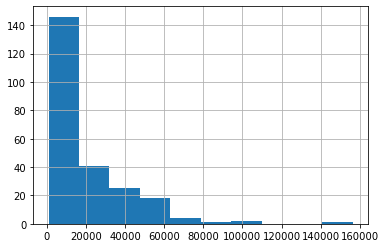

In [30]:
gdp_2014["GDP_Per_Capita"].hist(bins = 10)

In [31]:
#Histogram is right skewed

In [32]:
#Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [33]:
gdp_sorted = gdp_2014.sort_values("GDP_Per_Capita", ascending = False)

In [34]:
gdp_sorted

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133800
3691,Luxembourg,2014,108760.916000
5138,Qatar,2014,95578.416970
5464,Singapore,2014,87808.663160
561,Bermuda,2014,77361.104880
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777


In [35]:
print(gdp_sorted[:5][["Country","GDP_Per_Capita"]])

               Country  GDP_Per_Capita
3721  Macao SAR, China    156514.13380
3691        Luxembourg    108760.91600
5138             Qatar     95578.41697
5464         Singapore     87808.66316
561            Bermuda     77361.10488


In [36]:
print(gdp_sorted[-5:][["Country","GDP_Per_Capita"]])

                       Country  GDP_Per_Capita
4528                     Niger     1127.615541
1422           Dem. Rep. Congo     1029.790785
3781                    Malawi     1027.208496
827                    Burundi      886.235777
1047  Central African Republic      822.610458


In [37]:
#Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.

In [38]:
gdp_pivoted = gdp_df[gdp_df["Year"].isin([1990,2017])].pivot_table(values = 'GDP_Per_Capita', index = "Country", columns = "Year")

In [39]:
gdp_pivoted

Year,1990,2017
Country,,
Afghanistan,NaN,2058.383832
Albania,4842.734635,12811.759440
Algeria,8746.352901,11737.409350
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551680,19840.076120
...,...,...
Vietnam,1673.249634,7155.745829
West Bank and Gaza,NaN,6401.740891
World,9680.269697,16253.385520


In [40]:
gdp_pivoted = gdp_pivoted.dropna()

In [41]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759440
Algeria,8746.352901,11737.409350
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551680,19840.076120
Arab World,9694.667544,14555.474920
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385520


In [42]:
#Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [43]:
gdp_pivoted["Percent_Change"] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


<ipython-input-43-c36042363769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted["Percent_Change"] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


In [44]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4842.734635,12811.759440,164.556297
Algeria,8746.352901,11737.409350,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551680,19840.076120,28.335391
Arab World,9694.667544,14555.474920,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385520,67.902197


In [45]:
#How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [46]:
gdp_pivoted[gdp_pivoted["Percent_Change"] < 0].count()

Year
1990              17
2017              17
Percent_Change    17
dtype: int64

In [47]:
#17 countries experienced a negative percent change in GDP

In [48]:
#Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

In [49]:
print(gdp_pivoted.sort_values("Percent_Change", ascending = False).head())

Year                                                1990          2017  \
Country                                                                  
Equatorial Guinea                            1039.985049  22551.083250   
China                                        1423.896348  14344.421240   
Myanmar                                       619.645145   4739.910118   
East Asia & Pacific (excluding high income)  2173.223895  12986.322230   
East Asia & Pacific (IDA & IBRD)             2196.950288  13123.151790   

Year                                         Percent_Change  
Country                                                      
Equatorial Guinea                               2068.404562  
China                                            907.406281  
Myanmar                                          664.939443  
East Asia & Pacific (excluding high income)      497.560254  
East Asia & Pacific (IDA & IBRD)                 497.334945  


<AxesSubplot:xlabel='Year'>

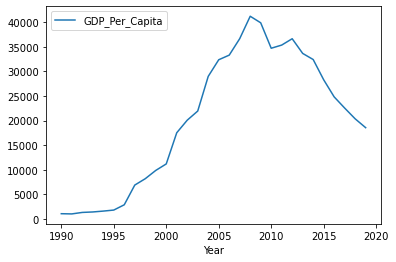

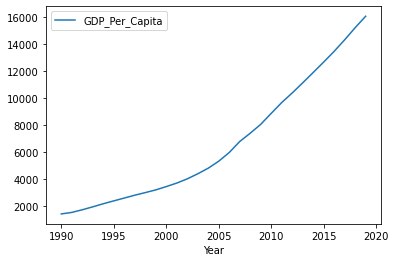

In [50]:
gdp_df[gdp_df["Country"]=="Equatorial Guinea"].plot(x = "Year", y = "GDP_Per_Capita", kind = "line")
gdp_df[gdp_df["Country"] == "China"].plot(x = "Year", y = "GDP_Per_Capita", kind = "line")


In [51]:
#Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [52]:
continents = pd.read_csv("../data/continents.csv")

In [53]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [54]:
#Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [55]:
gdp_df = pd.merge(left = continents, right = gdp_df, on = "Country")

In [56]:
#Determine the number of countries per continent. Create a bar chart showing this.

In [57]:
countries_per_continent = gdp_df.drop_duplicates(subset = "Country")

<AxesSubplot:>

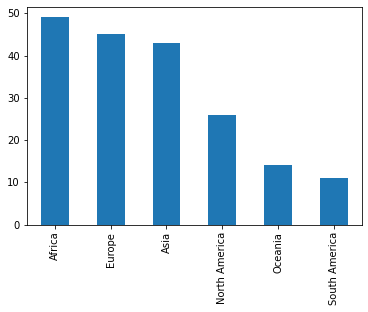

In [58]:
countries_per_continent["Continent"].value_counts().plot(kind = "bar")

In [59]:
#Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

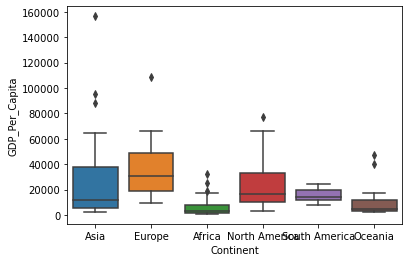

In [60]:
sns.boxplot(x = "Continent", y= "GDP_Per_Capita", data = gdp_df[gdp_df["Year"]== 2014])

In [61]:
#Read in internet_use.csv into a DataFrame called `internet_df`. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your `read_csv()` call to fix this. Again, **do not** modify the original datasets.

In [62]:
internet_df = pd.read_csv("../data/internet_use.csv", skipfooter = 182, engine = 'python')

In [63]:
internet_df.head(5)

,Country or Area,Year,Value,Value Footnotes,Unnamed: 4,Unnamed: 5
0,Afghanistan,2014,6.390000,NaN,NaN,NaN
1,Afghanistan,2013,5.900000,NaN,NaN,NaN
2,Afghanistan,2012,5.454545,NaN,NaN,NaN
3,Afghanistan,2011,5.000000,NaN,NaN,NaN
4,Afghanistan,2010,4.000000,NaN,NaN,NaN


In [64]:
internet_df[-5:]

,Country or Area,Year,Value,Value Footnotes,Unnamed: 4,Unnamed: 5
4490,Zimbabwe,1997,0.033080,NaN,NaN,NaN
4491,Zimbabwe,1996,0.016790,NaN,NaN,NaN
4492,Zimbabwe,1995,0.007684,NaN,NaN,NaN
4493,Zimbabwe,1994,0.001739,NaN,NaN,NaN
4494,Zimbabwe,1990,0.000000,NaN,NaN,NaN


In [65]:
#Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [66]:
internet_df = internet_df.drop(columns = ["Value Footnotes", "Unnamed: 4","Unnamed: 5"])

In [67]:
internet_df = internet_df.rename(columns = {"Country or Area":"Country","Value": "Internet_Users_Pct"})

In [68]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [69]:
# How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the `Internet_Users_Pct` column is a numeric data type and fix it if it is not.

In [70]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


In [71]:
#3 columns, 4495 rows.

In [72]:
#What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [73]:
internet_df[internet_df["Internet_Users_Pct"] !=0][["Year"]].min()

Year    1990
dtype: int64

In [74]:
#1990 is the first year with nonzero 

<AxesSubplot:xlabel='Year', ylabel='Internet_Users_Pct'>

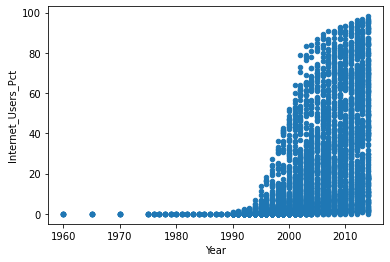

In [75]:
internet_df[["Year","Internet_Users_Pct"]].plot(x = "Year", y = "Internet_Users_Pct", kind = "scatter")

In [76]:
#Merge `gdp_df` and `internet_df` (on Country and Year) into a single DataFrame named `gdp_and_internet_use`. Keep only countries and years that appear in both tables. 

In [77]:
gdp_and_internet_use = pd.merge(left = gdp_df, right = internet_df, on = ["Country","Year"])

In [78]:
gdp_and_internet_use.head(5)

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Asia,Afghanistan,2014,2102.385234,6.390000
1,Asia,Afghanistan,2013,2116.465454,5.900000
2,Asia,Afghanistan,2012,2075.491747,5.454545
3,Asia,Afghanistan,2011,1904.559799,5.000000
4,Asia,Afghanistan,2010,1957.029338,4.000000


In [79]:
#Create a new DataFrame, named `gdp_and_internet_use_2014` by extracting data for the year 2014 from `gdp_and_internet_use`. How many countries have at least 90% internet users in 2014?

In [80]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014]

In [81]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014["Internet_Users_Pct"] >= 90].count()

Continent             13
Country               13
Year                  13
GDP_Per_Capita        13
Internet_Users_Pct    13
dtype: int64

In [82]:
#13 countries had over 90% internet users in 2014

In [83]:
#Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country.  What trends do you notice?

In [84]:
gdp_and_internet_use_2014_sorted = gdp_and_internet_use_2014.sort_values("GDP_Per_Capita", ascending= False)

In [85]:
gdp_and_internet_use_2014_sorted

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1798,Europe,Luxembourg,2014,108760.916000,94.67
2542,Asia,Qatar,2014,95578.416970,91.49
2772,Asia,Singapore,2014,87808.663160,82.00
372,North America,Bermuda,2014,77361.104880,96.80
627,North America,Cayman Islands,2014,66207.447230,74.10
...,...,...,...,...,...
3098,Africa,Togo,2014,1404.132938,5.70
2102,Africa,Mozambique,2014,1217.090210,5.94
2256,Africa,Niger,2014,1127.615541,1.95
1842,Africa,Malawi,2014,1027.208496,5.83


In [86]:
top_3_gdps = gdp_and_internet_use[(gdp_and_internet_use["Country"] == "Luxembourg")
                                 |(gdp_and_internet_use["Country"] == "Qatar")
                                 |(gdp_and_internet_use["Country"] == "Singapore")]
top_3_gdps

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1798,Europe,Luxembourg,2014,108760.91600,94.670000
1799,Europe,Luxembourg,2013,106767.27500,93.776500
1800,Europe,Luxembourg,2012,105411.46460,91.949924
1801,Europe,Luxembourg,2011,108355.58260,90.029859
1802,Europe,Luxembourg,2010,108047.34690,90.620000
...,...,...,...,...,...
2792,Asia,Singapore,1994,46895.05301,1.185204
2793,Asia,Singapore,1993,43555.61904,0.763278
2794,Asia,Singapore,1992,40077.54879,0.471368
2795,Asia,Singapore,1991,38728.40391,0.161504


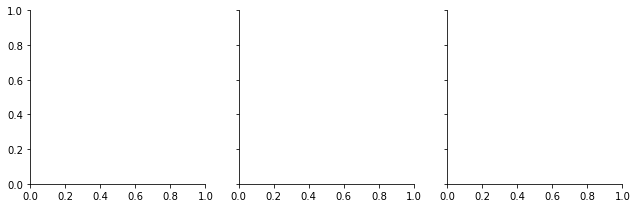

In [87]:
graph = sns.FacetGrid(top_3_gdps, col = "Country")

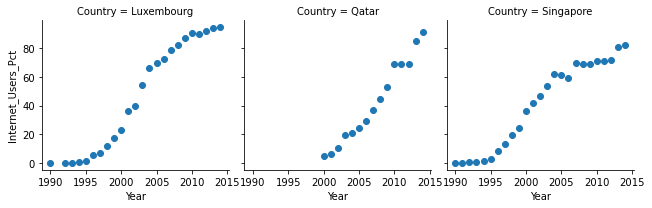

In [88]:
graph.map(plt.scatter, "Year", "Internet_Users_Pct")

In [89]:
#Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

<AxesSubplot:title={'center':'Internet Use vs. GDP Per Capita'}, xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

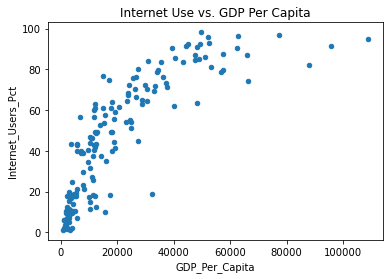

In [90]:
gdp_and_internet_use_2014.plot(x = "GDP_Per_Capita", y = "Internet_Users_Pct" , kind = "scatter", title = "Internet Use vs. GDP Per Capita")

In [91]:
#The data does not look like it is a linear correlation.

In [92]:
#Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [93]:
gdp_and_internet_use_2014["GDP_Per_Capita"].corr(gdp_and_internet_use_2014["Internet_Users_Pct"])

0.8246267227719846

In [94]:
#the correlation is 0.8246. This means that the variables have a strong positive correlation.

In [95]:
#Add a column to `gdp_and_internet_use_2014` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [96]:
gdp_and_internet_use_2014["log_of_GDP_Per_Capita"] = np.log10(gdp_and_internet_use_2014["GDP_Per_Capita"])

<ipython-input-96-2f27264dbf70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014["log_of_GDP_Per_Capita"] = np.log10(gdp_and_internet_use_2014["GDP_Per_Capita"])


In [97]:
gdp_and_internet_use_2014

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct,log_of_GDP_Per_Capita
0,Asia,Afghanistan,2014,2102.385234,6.39,3.322712
13,Europe,Albania,2014,11623.866680,60.10,4.065351
34,Africa,Algeria,2014,11512.705410,18.09,4.061177
56,Africa,Angola,2014,8239.828837,21.26,3.915918
76,North America,Antigua and Barbuda,2014,18104.241470,64.00,4.257780
...,...,...,...,...,...,...
3348,North America,United States,2014,57273.129070,87.36,4.757951
3373,Asia,Uzbekistan,2014,5764.492705,43.55,3.760761
3394,Oceania,Vanuatu,2014,3116.077025,18.80,3.493608
3414,Africa,Zambia,2014,3450.046561,17.34,3.537825


<AxesSubplot:xlabel='log_of_GDP_Per_Capita', ylabel='Internet_Users_Pct'>

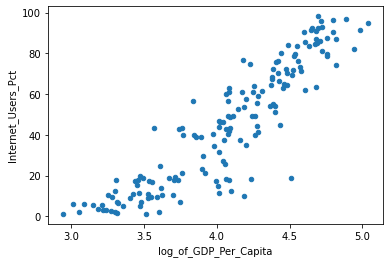

In [98]:
gdp_and_internet_use_2014.plot(x = "log_of_GDP_Per_Capita", y = "Internet_Users_Pct", kind = "scatter")

In [99]:
gdp_and_internet_use_2014["log_of_GDP_Per_Capita"].corr(gdp_and_internet_use_2014["Internet_Users_Pct"])

0.9039866356848423

In [100]:
#The Correlation between the log of GDP and Internet users is stronger than the correlation between GDP per Capita and Internet Users

In [101]:
#Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [102]:
gdp_United_States = gdp_and_internet_use[gdp_and_internet_use["Country"] == "United States"]
gdp_United_States

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3348,North America,United States,2014,57273.12907,87.360000
3349,North America,United States,2013,56269.95643,84.200000
3350,North America,United States,2012,55632.92976,79.300000
3351,North America,United States,2011,54806.11693,69.729461
3352,North America,United States,2010,54359.13397,71.690000
3353,North America,United States,2009,53440.91154,71.000000
3354,North America,United States,2008,55314.66006,74.000000
3355,North America,United States,2007,55916.71538,75.000000
3356,North America,United States,2006,55411.43755,68.931193
3357,North America,United States,2005,54395.35648,67.968053


In [103]:
gdp_United_States["GDP_Per_Capita"].corr(gdp_United_States["Internet_Users_Pct"])

0.9916600677796319

In [104]:
#This is meaningful. This means that within the United States, there is a strong correlation between the GDP Per
#Capita and the percentage of internet users. As the GDP in the US increases, so does the percentage of Internet
#users